<a href="https://colab.research.google.com/github/ggasparis/supervised-learning/blob/main/supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: Classification

## Small dataset (S)
Αρχικά κάνουμε upgrade στις βιβλιοθήκες που θα χρειαστούμε:

In [ ]:
!pip3 install --upgrade pip #upgrade pip package installer
!pip3 install scikit-learn --upgrade #upgrade scikit-learn package
!pip3 install numpy --upgrade #upgrade numpy package
!pip3 install pandas --upgrade #upgrade pandas package
!pip3 install --upgrade matplotlib 

Ύστερα αρχιζουμε να μελετάμε το dataset μας, το οποίο αντιστοιχεί στο S09 και ονομάζεται "Connectionist Bench (Sonar, Mines vs. Rocks)". Η πληροφορία που μεταφέρει αυτο το dataset είναι, συνοπτικά, σημάτα σόναρ που έχουν ληφθεί υπό ποικίλες γωνίες και συνθήκες και αντιστοιχούν είτε σε μεταλλικό κύλινδρο είτε σε βράχο.

Πιο συγκεκριμένα:
* Διαθέτουμε 208 μοτίβα - instances, 111 εκ των οποίων αντιστοιχούν σε μεταλλικό κύλινδρο και 97 εκ των οποίων αντιστοιχούν σε βράχο.
* Κάθε μοτίβο είναι ένα σύνολο 60 χαρακτηριστικών - attributes, αριθμών στην περιοχή 0.0 έως 1.0.
* Σύμφωνα με τις πληροφορίες που δίνονται, όλα τα χαρακτηριστικά είναι διατεταγμένα, καθώς αντιστοιχούν σε μετρήσεις ληφθείσες υπό αυξανόμενη σειρά γωνίας διαστάσεων, χωρίς ωστόσο να κωδικοποιούν άμεσα τη γωνία.
* Υπάρχει ένα επιπλέον χαρακτηριστικό (ετικέτα - label) που εκφράζει αν τελικά το δείγμα αντιστοιχεί σε μεταλλικό κύλινδρο (M) ή βράχο (R). Αυτό μας οδηγεί και στο συμπέρασμα ότι έχουμε 2 κλάσεις στο dataset μας.
* Το dataset μας είναι ισορροπημένο καθώς έχουμε συχνότητα εμφάνισης M -> 111 (53.4%) και R -> 97 (46.6%).
* Δεν δηλώνονται ή παρατηρούνται απουσιάζουσες τιμές.

Για να εισάγουμε το dataset μας κατεβάζουμε το αρχείο sonar.all-data και το ανεβάζουμε στο ιδιο directory με αυτό το notebook, χωρίς να προβούμε σε κάποια τροποποίηση:

In [ ]:
!ls

Nomao.data  sample_data  sonar.all-data


Διαβάζουμε το dataset μας:

In [ ]:
import pandas as pd
import numpy as np
 
df = pd.read_csv("sonar.all-data")
df


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0

Παρατηρούμε ότι η πρώτη γραμμή δεν ειναι επικεφαλίδα και δεν δίνει κάποια ονομασία στα attributes, αλλά αποτελεί ένα instance, οπότε το χρειαζόμαστε. Επίσης βλέπουμε ότι η αρίθμηση γραμμών γίνεται αριστερά των δειγμάτων και πως οι ετικέτες των κλάσεων δίνονται στην τελευταία κολώνα.

In [ ]:
df= pd.read_csv("sonar.all-data", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1

Στη συνέχεια μετατρέπουμε κατάλληλα το dataset μας χωρίζοντάς το σε features και labels:

In [ ]:
labels_df = df.iloc[:, [60]] # τα labels είναι στην τελευταία κολώνα
features_df = df.iloc[:, 0:60]

In [ ]:
labels_df

,60
0,R
1,R
2,R
3,R
4,R
...,...
203,M
204,M
205,M
206,M


In [ ]:
features_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1.0000,0.9979,0.8297,0.7

Στη συνέχεια θέλουμε να αντιμετωπίσουμε την binary class μας και αυτο που κάνουμε είναι η αραιή - sparse αναπαράσταση με 0 όσα δείγματα αντιστοιχούν σε μεταλλικό κύλινδρο (M) και 1 όσα αντιστοιχούν σε βράχο (R):

In [ ]:
# μετατρέπουμε το dataframe σε numpy array
np_features = features_df.values

print(np_features[0]) #τυπώνουμε το πρώτο δείγμα
print(np_features.shape) #τυπώνουμε τις διαστάσεις του πίνακα των χαρακτηριστικών
# επιβεβαιώνουμε ότι ο αρχικός πίνακας features ναι ίδιος με τον np_features
print(np.array_equal(features_df, np_features))
print(np_features - features_df)
# είναι ίδιοι πρακτικά, απλά ο np_features έχει λίγο μεγαλύτερο precision 

[0.02   0.0371 0.0428 0.0207 0.0954 0.0986 0.1539 0.1601 0.3109 0.2111
 0.1609 0.1582 0.2238 0.0645 0.066  0.2273 0.31   0.2999 0.5078 0.4797
 0.5783 0.5071 0.4328 0.555  0.6711 0.6415 0.7104 0.808  0.6791 0.3857
 0.1307 0.2604 0.5121 0.7547 0.8537 0.8507 0.6692 0.6097 0.4943 0.2744
 0.051  0.2834 0.2825 0.4256 0.2641 0.1386 0.1051 0.1343 0.0383 0.0324
 0.0232 0.0027 0.0065 0.0159 0.0072 0.0167 0.018  0.0084 0.009  0.0032]
(208, 60)
True
      0    1    2    3    4    5    6   ...   53   54   55   56   57   58   59
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
203  

Κάνουμε mapping για την αντιστοίχιση των κλάσεων από M,R σε 0,1 αντίστοιχα.

In [ ]:
mapping = {"M":0, "R":1}
labels_df = labels_df.replace({"60": mapping})
np_labels = labels_df.values.flatten()

# επιβεβαιώνουμε ότι ο αρχικός πίνακας labels είναι ίδιος με τον np_labels
print(np_labels)
print(np_labels.shape)
print(np.array_equal(labels_df, np_labels))

['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']
(208,)
False


### Classification 
#### Split in train & test set 

Χωρίζουμε το dataset σε train & test set, κρατώντας 20% για test.


In [ ]:
from sklearn.model_selection import train_test_split

#Split our data with 20% on test set
train, test, train_labels, test_labels = train_test_split(features_df, labels_df, test_size=0.20)

#### Baseline Classification

Ορίσουμε τους dummy classifiers.

In [ ]:
from sklearn.dummy import DummyClassifier

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant='M')
dc_constant_1 = DummyClassifier(strategy="constant", constant='R')
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

Κάνουμε εκπαίδευση και predict στο test set και βρίσκουμε τα accuracies, τα οποία αποθηκεύουμε σε ένα dictionary.
Χρησιμοποιούμε την έτοιμη συνάρτηση ```accuracy_score()```.


In [ ]:
from sklearn.metrics import accuracy_score

sonar_accuracy={}
#με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
#με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου (είσοδος τα χαρακτηριστικά μόνο)
model = dc_uniform.fit(train, train_labels)
sonar_accuracy['uniform (random)'] = dc_uniform.score(test, test_labels)
preds_uniform = dc_uniform.predict(test)
print(dc_uniform.score(test, test_labels))
print(accuracy_score(test_labels, preds_uniform))

model = dc_constant_0.fit(train, train_labels)
sonar_accuracy['constant 0'] = dc_constant_0.score(test, test_labels)
preds_constant_0 = dc_constant_0.predict(test)
print(dc_constant_0.score(test, test_labels))
print(accuracy_score(test_labels, preds_constant_0))

model = dc_constant_1.fit(train, train_labels)
sonar_accuracy['constant 1'] = dc_constant_1.score(test, test_labels)
preds_constant_1 = dc_constant_1.predict(test)
print(dc_constant_1.score(test, test_labels))
print(accuracy_score(test_labels, preds_constant_1))

model = dc_most_frequent.fit(train, train_labels)
sonar_accuracy['most frequent label'] = dc_most_frequent.score(test, test_labels)
preds_most_frequent = dc_most_frequent.predict(test)
print(dc_most_frequent.score(test, test_labels))
print(accuracy_score(test_labels, preds_most_frequent))

model = dc_stratified.fit(train, train_labels)
sonar_accuracy['stratified'] = dc_stratified.score(test, test_labels)
preds_stratified = dc_stratified.predict(test)
print(dc_stratified.score(test, test_labels))
print(accuracy_score(test_labels, preds_stratified))

0.5238095238095238
0.5238095238095238
0.5952380952380952
0.5952380952380952
0.40476190476190477
0.40476190476190477
0.5952380952380952
0.5952380952380952
0.47619047619047616
0.5476190476190477


In [ ]:

print("Classification Accuracy on the Sonar Dataset (20% test set)\n")
sorted_accuracy = [(k, sonar_accuracy[k]) for k in sorted(sonar_accuracy, key=sonar_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k,v)


Classification Accuracy on the Sonar Dataset (20% test set)

constant 0 0.5952380952380952
most frequent label 0.5952380952380952
stratified 0.5476190476190477
uniform (random) 0.47619047619047616
constant 1 0.40476190476190477


#### Naive Bayes 
Στη συνέχεα εξετάζουμε τον Gaussian Naive Bayes ταξινομητή.

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
model = gnb.fit(train, train_labels)

# η GaussianNB έχει builtin μέθοδο υπολογισμό accuracy. Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
sonar_accuracy['gaussian naive bayes'] = gnb.score(test, test_labels)

# και ξανατυπώνουμε τα sorted αποτελέσματα
print("Classification Accuracy on the Sonar Dataset (20% test set)\n")

sorted_accuracy = [(k, sonar_accuracy[k]) for k in sorted(sonar_accuracy, key=sonar_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k,v)

Classification Accuracy on the Sonar Dataset (20% test set)

constant 0 0.5952380952380952
most frequent label 0.5952380952380952
stratified 0.5476190476190477
gaussian naive bayes 0.5476190476190477
uniform (random) 0.47619047619047616
constant 1 0.40476190476190477


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### κΝΝ
Εξετάζουμε τον k Nearest Neighbor(kNN) Classifier.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train, train_labels)
pred = knn.predict(test)
print(accuracy_score(test_labels, pred))

0.7857142857142857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


#### Αξιολόγηση ταξινομητών
Κάνουμε 10-fold cross validation για τον υπολογισμό του βέλτιστου kNN

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

myList = list(range(1,60,2)) #λίστα μέχρι το 60
# Κρατάμε μόνο τα περιττά k
#neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train, train_labels, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

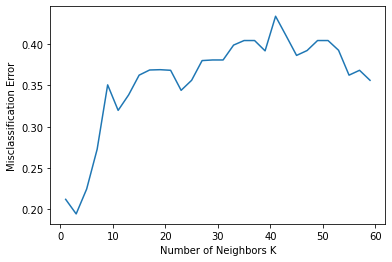

The optimal number of neighbors (calculated in the training set) is 3

Optimal accuracy on the test set is 0.7380952380952381 with k= 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
# Κάνουμε import την matplotplib
import matplotlib.pyplot as plt

# το σφάλμα είναι το αντίστροφο της πιστότητας
mean_error = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, mean_error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# determining best k
optimal_k = neighbors[mean_error.index(min(mean_error))]
print("The optimal number of neighbors (calculated in the training set) is %d" % optimal_k)

# για το optimal k παίρνουμε και τα αποτέλεσματα στο test set
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(train, train_labels)
pred = knn.predict(test)
print("\nOptimal accuracy on the test set is", accuracy_score(test_labels, pred), "with k=", optimal_k)

#### Evaluation - confunsion matrix
Στη συνέχεια για κάθε estimator, εκτυπώνουμε τον πίνακα σύγχυσης (confunsion matrix). Ο πίνακας σύγχησης είναι η βάση μέτρησης της απόδοσης των ταξιμομητών.

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix_uniform = confusion_matrix(test_labels, preds_uniform)
# τυπώνουμε το confusion matrix
print("\ncnf_matrix_uniform\n", cnf_matrix_uniform)

cnf_matrix_constant_0 = confusion_matrix(test_labels, preds_constant_0)
print ("\ncnf_matrix_constant_0\n" , cnf_matrix_constant_0)

cnf_matrix_constant_1 = confusion_matrix(test_labels, preds_constant_1)
print( "\ncnf_matrix_constant_1\n", cnf_matrix_constant_1)

cnf_matrix_most_frequent = confusion_matrix(test_labels, preds_most_frequent)
print ("\ncnf_matrix_most_frequent\n" , cnf_matrix_most_frequent)

cnf_matrix_stratified = confusion_matrix(test_labels, preds_stratified)
print("\ncnf_matrix_stratified\n", cnf_matrix_stratified)

cnf_matrix_knn = confusion_matrix(test_labels, pred)
# τυπώνουμε τα labels
#print(labels_df, "\n")
print("\ncnf_matrix_knn\n",cnf_matrix_knn)


cnf_matrix_uniform
 [[11 14]
 [ 6 11]]

cnf_matrix_constant_0
 [[25  0]
 [17  0]]

cnf_matrix_constant_1
 [[ 0 25]
 [ 0 17]]

cnf_matrix_most_frequent
 [[25  0]
 [17  0]]

cnf_matrix_stratified
 [[14 11]
 [ 8  9]]

cnf_matrix_knn
 [[19  6]
 [ 5 12]]


Στη συνέχεια υπολογίζουμε τα precision, recall και f1 για κάθε estimator. Δημιουργούμε δύο dictionaries, ένα που περιέχει τα ```f1-weighted average``` για κάθε εκτιμητή και ένα dictionary που περιέχει τα ```f1-macro average```.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

f1_macro={}
f1_macro['uniform'] = precision_recall_fscore_support(test_labels, preds_uniform, average='macro')[2]
f1_macro['constant 1'] = precision_recall_fscore_support(test_labels, preds_constant_1, average='macro')[2]
f1_macro['constant 0'] = precision_recall_fscore_support(test_labels, preds_constant_0, average='macro')[2]
f1_macro['most_frequent'] = precision_recall_fscore_support(test_labels, preds_most_frequent, average='macro')[2]
f1_macro['stratified'] = precision_recall_fscore_support(test_labels, preds_stratified, average='macro')[2]
f1_macro['knn'] = precision_recall_fscore_support(test_labels, pred, average='macro')[2]

f1_micro={}
f1_micro['uniform'] = precision_recall_fscore_support(test_labels, preds_uniform, average='micro')[2]
f1_micro['constant_1'] = precision_recall_fscore_support(test_labels, preds_constant_1, average='micro')[2]
f1_micro['constant_0'] = precision_recall_fscore_support(test_labels, preds_constant_0, average='micro')[2]
f1_micro['most_frequent'] = precision_recall_fscore_support(test_labels, preds_most_frequent, average='micro')[2]
f1_micro['stratified'] = precision_recall_fscore_support(test_labels, preds_stratified, average='micro')[2]
f1_micro['knn'] = precision_recall_fscore_support(test_labels, pred, average='micro')[2]

# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
print(precision_recall_fscore_support(test_labels, pred, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
print(precision_recall_fscore_support(test_labels, pred, average='micro'), "\n")

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
print(precision_recall_fscore_support(test_labels, pred, average='macro'), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας. Με average = weighted κάθε κλάση μετρά στο μέσο όρο ανάλογα με το support της.
print(precision_recall_fscore_support(test_labels, pred, average='weighted'), "\n")

(array([0.79166667, 0.66666667]), array([0.76      , 0.70588235]), array([0.7755102 , 0.68571429]), array([25, 17])) 

(0.7380952380952381, 0.7380952380952381, 0.7380952380952381, None) 

(0.7291666666666666, 0.7329411764705882, 0.7306122448979592, None) 

(0.7410714285714285, 0.7380952380952381, 0.7391642371234207, None) 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           M       0.79      0.76      0.78        25
           R       0.67      0.71      0.69        17

    accuracy                           0.74        42
   macro avg       0.73      0.73      0.73        42
weighted avg       0.74      0.74      0.74        42



#### Bar plots σύγκρισης
Εκτυπώνουμε plots σύγκρισης για τις τιμές του f1 για όλους τους ταξινομητές

No handles with labels found to put in legend.



f1-macro average για τους classifiers:

constant 1: 0.288135593220339
constant 0: 0.3731343283582089
most_frequent: 0.3731343283582089
uniform: 0.5238095238095238
stratified: 0.5411155836687752
knn: 0.7306122448979592

f1-micro average για τους classifiers:

constant_1: 0.40476190476190477
uniform: 0.5238095238095238
stratified: 0.5476190476190477
constant_0: 0.5952380952380952
most_frequent: 0.5952380952380952
knn: 0.7380952380952381


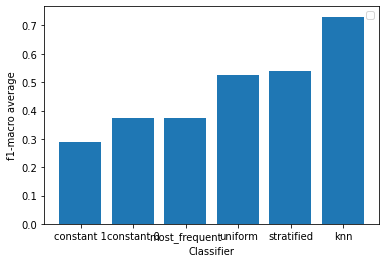

No handles with labels found to put in legend.


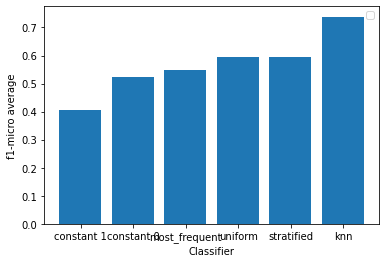

In [ ]:
import matplotlib.pyplot as plt

ky=[]
f1=[]
f2=[]

print("\nf1-macro average για τους classifiers:\n")
for key, value in sorted(f1_macro.items(), key=lambda k_v: (k_v[1], k_v[0]) ):
    print("%s: %s" % (key, value))
    f1.append(value)
    ky.append(key)

print("\nf1-micro average για τους classifiers:\n")
for key, value in sorted(f1_micro.items(), key=lambda k_v: (k_v[1], k_v[0])):
    print("%s: %s" % (key, value))
    f2.append(value)

fig= plt.figure()
ax = fig.add_subplot(1,1,1)
bar_l = np.arange(1,7)
tick_pos = [i + (0.05 / 6) for i in bar_l]

ax1 = ax.bar(bar_l,f1,align='center')
ax.set_ylabel("f1-macro average")
ax.set_xlabel("Classifier")
ax.legend(loc="best")
plt.xticks(tick_pos,ky)
plt.yticks()
plt.show()


fig= plt.figure()
ax = fig.add_subplot(1,1,1)
bar_l = np.arange(1,7)
tick_pos = [i + (0.05 / 6) for i in bar_l]

ax1 = ax.bar(bar_l,f2,align='center')
ax.set_ylabel("f1-micro average")
ax.set_xlabel("Classifier")
ax.legend(loc="best")
plt.xticks(tick_pos,ky)
plt.yticks()
plt.show()
   

### Βελτιστοποίηση ταξινομητών
Στο κομμάτι αυτό κάνουμε preprocessing των δεδομένων. Το dataset είναι ισορροπημένο και δεν χρειάζεται να κάνουμε εξισοππόπηση. 
Προχωράμε στο να βρούμε τις βέλτιστες παραμέτρους στο kNN. Η υπερπαράμετρος που θέλουμε είναι η ```n_neighbors```.

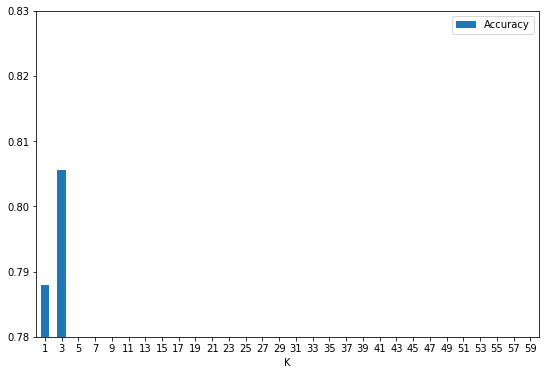

In [ ]:
def plot_accuracy(knn_list_scores):
    pd.DataFrame({"K":[i for i in range(1,60,2)], "Accuracy":knn_list_scores}).set_index("K").plot.bar(figsize= (9,6),ylim=(0.78,0.83),rot=0)
    plt.show()
plot_accuracy(cv_scores)

## Μεγάλο dataset (Β)

Το μεγάλο dataset μας αντιστοιχεί στο B11 και ονομάζεται "Nomao". Η πληροφορία που μεταφέρει αυτο το dataset είναι, συνοπτικά, τα χαρακτηριστικά σύγκρισης μεταξύ δύο σημείων από τα οποία η μηχανή αναζήτησης τοποθεσιών Nomao έχει συλλέξει δεδομένα, στοχεύοντας στην ανίχνευση των δεδομένων που αναφέρονται στο ίδιο μέρος.

Πιο συγκεκριμένα:
* Διαθέτουμε 15623 μοτίβα - instances, 
* Παρατηρούνται απουσιάζουσες τιμές.
* Ένα εκ των χαρακτηριστικών είναι η ετικέτα - label που εκφράζει αν τελικά το δείγμα αντιστοιχεί σε σύγκριση σημείων που ταυτίζονται (+1) ή όχι (-1). Αυτό μας οδηγεί και στο συμπέρασμα ότι έχουμε 2 κλάσεις στο dataset μας.
* Διαθέτουμε attributes κατηγορικά, μη διατεταγμένα αλλα και διατεταγμένα οπως φαινεται παρακάτω:

1. id: name is composed of the names of the spots that are compared, separated by a sharp (#).			
2. clean_name_intersect_min: continuous.			
3. clean_name_intersect_max: continuous.			
4. clean_name_levenshtein_sim: continuous.			
5. clean_name_trigram_sim: continuous.			
6. clean_name_levenshtein_term: continuous.			
7. clean_name_trigram_term: continuous.			
8. clean_name_including: n,s,m.			
9. clean_name_equality: n,s,m.			
10.	city_intersect_min: continuous.			
11.	city_intersect_max: continuous.			
12.	city_levenshtein_sim: continuous.			
13.	city_trigram_sim: continuous.			
14.	city_levenshtein_term: continuous.			
15.	city_trigram_term: continuous.			
16.	city_including: n,s,m.			
17.	city_equality: n,s,m.			
18.	zip_intersect_min: continuous.			
19.	zip_intersect_max: continuous.			
20.	zip_levenshtein_sim: continuous.			
21.	zip_trigram_sim: continuous.			
22.	zip_levenshtein_term: continuous.			
23.	zip_trigram_term: continuous.			
24.	zip_including: n,s,m.			
25.	zip_equality: n,s,m.			
26.	street_intersect_min: continuous.			
27.	street_intersect_max: continuous.			
28.	street_levenshtein_sim: continuous.			
29.	street_trigram_sim: continuous.			
30.	street_levenshtein_term: continuous.			
31.	street_trigram_term: continuous.			
32.	street_including: n,s,m.			
33.	street_equality: n,s,m.			
34.	website_intersect_min: continuous.			
35.	website_intersect_max: continuous.			
36.	website_levenshtein_sim: continuous.			
37.	website_trigram_sim: continuous.			
38.	website_levenshtein_term: continuous.			
39. website_trigram_term: continuous.			
40. website_including: n,s,m.			
41.	website_equality: n,s,m.			
42.	countryname_intersect_min: continuous.			
43.	countryname_intersect_max: continuous.			
44.	countryname_levenshtein_sim: continuous.			
45.	countryname_trigram_sim: continuous.			
46.	countryname_levenshtein_term: continuous.			
47.	countryname_trigram_term: continuous.			
48.	countryname_including: n,s,m.			
49.	countryname_equality: n,s,m.			
50.	geocoderlocalityname_intersect_min: continuous.	
51.	geocoderlocalityname_intersect_max: continuous.	
52.	geocoderlocalityname_levenshtein_sim: continuous		
53.	geocoderlocalityname_trigram_sim: continuous.		
54. geocoderlocalityname_levenshtein_term: continuous.			
55. geocoderlocalityname_trigram_term: continuous.
56.	geocoderlocalityname_including: n,s,m.			
57.	geocoderlocalityname_equality: n,s,m.			
58.	geocoderinputaddress_intersect_min: continuous.	
59.	geocoderinputaddress_intersect_max: continuous.	
60.	geocoderinputaddress_levenshtein_sim: continuous	
61.	geocoderinputaddress_trigram_sim: continuous.
62.	geocoderinputaddress_levenshtein_term: continuous.			
63.	geocoderinputaddress_trigram_term: continuous.	
64.	geocoderinputaddress_including: n,s,m.			
65.	geocoderinputaddress_equality: n,s,m.			
66.	geocoderoutputaddress_intersect_min: continuous.
67.	geocoderoutputaddress_intersect_max: continuous.
68.	geocoderoutputaddress_levenshtein_sim: continuous.			
69.	geocoderoutputaddress_trigram_sim: continuous.
70.	geocoderoutputaddress_levenshtein_term: continuous.			
71.	geocoderoutputaddress_trigram_term: continuous.
72.	geocoderoutputaddress_including: n,s,m.			
73.	geocoderoutputaddress_equality: n,s,m.			
74.	geocoderpostalcodenumber_intersect_min: continuous.			
75.	geocoderpostalcodenumber_intersect_max: continuous.			
76.	geocoderpostalcodenumber_levenshtein_sim: continuous.			
77.	geocoderpostalcodenumber_trigram_sim: continuous		
78.	geocoderpostalcodenumber_levenshtein_term: continuous.			
79.	geocoderpostalcodenumber_trigram_term: continuous.			
80.	geocoderpostalcodenumber_including: n,s,m.			
81.	geocoderpostalcodenumber_equality: n,s,m.			
82.	geocodercountrynamecode_intersect_min: continuous.			
83.	geocodercountrynamecode_intersect_max: continuous.			
84.	geocodercountrynamecode_levenshtein_sim: continuous.			
85.	geocodercountrynamecode_trigram_sim: continuous
86.	geocodercountrynamecode_levenshtein_term: continuous.			
87.	geocodercountrynamecode_trigram_term: continuous		
88.	geocodercountrynamecode_including: n,s,m.			
89.	geocodercountrynamecode_equality: n,s,m.			
90.	phone_diff: continuous.			
91.	phone_levenshtein: continuous.			
92.	phone_trigram: continuous.			
93.	phone_equality: n,s,m.			
94.	fax_diff: continuous.			
95.	fax_levenshtein: continuous.			
96.	fax_trigram: continuous.			
97.	fax_equality: n,s,m.			
98.	street_number_diff: continuous.			
99.	street_number_levenshtein: continuous.			
100.	street_number_trigram: continuous.			
101.	street_number_equality: n,s,m.			
102.	geocode_coordinates_long_diff: continuous.
103.	geocode_coordinates_long_levenshtein: continuous		
104.	geocode_coordinates_long_trigram: continuous.
105.	geocode_coordinates_long_equality: n,s,m.			
106.	geocode_coordinates_lat_diff: continuous.			
107.	geocode_coordinates_lat_levenshtein: continuous
108.	geocode_coordinates_lat_trigram: continuous.
109.	geocode_coordinates_lat_equality: n,s,m.			
110.	coordinates_long_diff: continuous.			
111.	coordinates_long_levenshtein: continuous.			
112.	coordinates_long_trigram: continuous.			
113.	coordinates_long_equality: n,s,m.			
114.	coordinates_lat_diff: continuous.			
115.	coordinates_lat_levenshtein: continuous.			
116.	coordinates_lat_trigram: continuous.			
117.	coordinates_lat_equality: n,s,m.			
118.	geocode_coordinates_diff: continuous.			
119.	coordinates_diff: continuous.			
120.	label: +1,-1.

Για να εισάγουμε το dataset μας κατεβάζουμε το αρχείο Nomao.data και το ανεβάζουμε στο ιδιο directory με αυτό το notebook. Έχοντας ενημερωθεί για τις απουσιάζουσες τιμές και οτι μεταφράζονται με ερωτηματικό ? στο dataset, τις αναγνωρίζουμε κατα την ανάγωση αυτού:

In [ ]:
import pandas as pd
 
df_1 = pd.read_csv("Nomao.data",na_values = ["?"])
df_1

,0#1,1,1.1,1.2,1.3,1.4,1.5,s,s.1,?,?.1,?.2,?.3,?.4,?.5,m,m.1,?.6,?.7,?.8,?.9,?.10,?.11,m.2,m.3,?.12,?.13,?.14,?.15,?.16,?.17,m.4,m.5,?.18,?.19,?.20,?.21,?.22,?.23,m.6,...,s.7,1.24,1.25,1.26,1.27,1.28,1.29,s.8,s.9,?.30,?.31,?.32,m.10,?.33,?.34,?.35,m.11,1.0,1.0.1,1.0.2,s.10,1.0.3,1.0.4,1.0.5,s.11,1.0.6,1.0.7,1.0.8,s.12,0.999967001089,0.75,0.5,n.2,0.999953002209,0.777777777778,0.461538463831,n.3,1.0.9,0.999999996702,+1
0,0#2,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,s,n,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,NaN,NaN,NaN,m,NaN,NaN,NaN,m,1.0,1.0,1.0,s,1.000000,1.000000,1.000000,s,1.000000,1.000000,1.000000,s,0.999807,0.500000,0.307692,n,0.999983,0.538462,0.437500,n,1.000000,1.000000,1
1,0#3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,NaN,NaN,NaN,m,NaN,NaN,NaN,m,1.0,1.0,1.0,s,1.000000,1.000000,1.000000,s,1.000000,1.000000,1.000000,s,0.999983,0.666667,0.461538,n,0.999993,0.800000,0.666667,n,1.000000,1.000000,1
2,4#5,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,s,n,1.0,1.0,1.0,1.0,1.0,1.0,s,s,1.0,1.0,1.00,1.000000,1.00,1.000000,s,s,1.0,1.000000,1.000000,1.000000,1.0000,1.000000,s,s,NaN,NaN,NaN,NaN,NaN,NaN,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,1.468688e-09,0.272727,0.090909,n,NaN,NaN,NaN,m,1.0,1.0,1.0,s,0.999774,0.555556,0.333333,n,0.999962,0.500000,0.294118,n,0.998023,0.500000,0.285714,n,0.998605,0.555556,0.384615,n,1.000000,0.999994,1
3,6#7,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,n,n,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,1.000000e+00,1.000000,1.000000,s,NaN,NaN,NaN,m,NaN,NaN,NaN,n,1.000000,1.000000,1.000000,s,1.000000,1.000000,1.000000,s,NaN,NaN,NaN,m,NaN,NaN,NaN,m,1.000000,NaN,1
4,8#9,1.000000,0.500000,0.666667,0.666667,0.375000,0.411765,s,n,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,1.0,1.0,1.0,1.0,1.0,1.0,s,...,n,1.0,1.0,1.0,1.0,1.0,1.0,s,s,1.000000e+00,1.000000,1.000000,s,NaN,NaN,NaN,m,1.0,1.0,1.0,s,0.999513,0.444444,0.250000,n,0.999761,0.700000,0.400000,n,0.999296,0.625000,0.285714,n,0.999207,0.666667,0.333333,n,1.000000,0.999999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34459,505442#638600,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,n,n,0.0,0.0,0.0,0.0,0.0,0.0,n,n,0.0,0.0,0.25,0.111111,0.25,0.111111,n,n,0.0,0.000000,0.266667,0.035714,0.1875,0.019231,n,n,NaN,NaN,NaN,NaN,NaN,NaN,m,...,n,1.0,1.0,1.0,1.0,1.0,1.0,s,s,2.904444e-04,0.600000,0.375000,n,NaN,NaN,NaN,m,NaN,NaN,NaN,n,0.998205,0.277778,0.173913,n,0.999826,0.277778,0.200000,n,0.997969,0.222222,0.190476,n,0.999685,0.722222,0.272727,n,0.999997,0.999996,-1
34460,40886#102945,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,n,n,1.0,1.0,1.0,1.0,1.0,1.0,s,s,NaN,NaN,NaN,NaN,NaN,NaN,m,m,1.0,1.000000,1.000000,1.000000,1.0000,1.000000,s,s,NaN,NaN,NaN,NaN,NaN,NaN,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,NaN,NaN,NaN,m,NaN,NaN,NaN,m,NaN,NaN,NaN,n,0.999942,0.277778,0.217391,n,0.999747,0.333333,0.260870,n,0.999929,0.777778,0.300000,n,0.999745,0.388889,0.333333,n,1.000000,1.000000,-1
34461,710009#742141,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,n,n,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,1.000000e+00,1.000000,1.000000,s,1.0,1.0,1.0,s,NaN,NaN,NaN,n,1.000000,1.000000,1.000000,s,1.000000,1.000000,1.000000,s,NaN,NaN,NaN,m,NaN,NaN,NaN,m,1.000000,NaN,1
34

Παρατηρούμε ότι η πρώτη γραμμή δεν ειναι επικεφαλίδα και δεν δίνει κάποια ονομασία στα attributes, αλλά αποτελεί ένα instance, οπότε το χρειαζόμαστε. Επίσης βλέπουμε ότι η αρίθμηση γραμμών γίνεται αριστερά των δειγμάτων και πως οι ετικέτες των κλάσεων δίνονται στην τελευταία κολώνα.

In [ ]:
df_1 = pd.read_csv("Nomao.data",na_values = ["?"], header=None)
df_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,0#1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,NaN,NaN,NaN,m,NaN,NaN,NaN,m,1.0,1.0,1.0,s,1.000000,1.000000,1.000000,s,1.000000,1.000000,1.000000,s,0.999967,0.750000,0.500000,n,0.999953,0.777778,0.461538,n,1.000000,1.000000,1
1,0#2,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,s,n,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,NaN,NaN,NaN,m,NaN,NaN,NaN,m,1.0,1.0,1.0,s,1.000000,1.000000,1.000000,s,1.000000,1.000000,1.000000,s,0.999807,0.500000,0.307692,n,0.999983,0.538462,0.437500,n,1.000000,1.000000,1
2,0#3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,NaN,NaN,NaN,m,NaN,NaN,NaN,m,1.0,1.0,1.0,s,1.000000,1.000000,1.000000,s,1.000000,1.000000,1.000000,s,0.999983,0.666667,0.461538,n,0.999993,0.800000,0.666667,n,1.000000,1.000000,1
3,4#5,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,s,n,1.0,1.0,1.0,1.0,1.0,1.0,s,s,1.0,1.0,1.00,1.000000,1.00,1.000000,s,s,1.0,1.000000,1.000000,1.000000,1.0000,1.000000,s,s,NaN,NaN,NaN,NaN,NaN,NaN,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,1.468688e-09,0.272727,0.090909,n,NaN,NaN,NaN,m,1.0,1.0,1.0,s,0.999774,0.555556,0.333333,n,0.999962,0.500000,0.294118,n,0.998023,0.500000,0.285714,n,0.998605,0.555556,0.384615,n,1.000000,0.999994,1
4,6#7,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,n,n,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,1.000000e+00,1.000000,1.000000,s,NaN,NaN,NaN,m,NaN,NaN,NaN,n,1.000000,1.000000,1.000000,s,1.000000,1.000000,1.000000,s,NaN,NaN,NaN,m,NaN,NaN,NaN,m,1.000000,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,505442#638600,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,n,n,0.0,0.0,0.0,0.0,0.0,0.0,n,n,0.0,0.0,0.25,0.111111,0.25,0.111111,n,n,0.0,0.000000,0.266667,0.035714,0.1875,0.019231,n,n,NaN,NaN,NaN,NaN,NaN,NaN,m,...,n,1.0,1.0,1.0,1.0,1.0,1.0,s,s,2.904444e-04,0.600000,0.375000,n,NaN,NaN,NaN,m,NaN,NaN,NaN,n,0.998205,0.277778,0.173913,n,0.999826,0.277778,0.200000,n,0.997969,0.222222,0.190476,n,0.999685,0.722222,0.272727,n,0.999997,0.999996,-1
34461,40886#102945,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,n,n,1.0,1.0,1.0,1.0,1.0,1.0,s,s,NaN,NaN,NaN,NaN,NaN,NaN,m,m,1.0,1.000000,1.000000,1.000000,1.0000,1.000000,s,s,NaN,NaN,NaN,NaN,NaN,NaN,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,NaN,NaN,NaN,m,NaN,NaN,NaN,m,NaN,NaN,NaN,n,0.999942,0.277778,0.217391,n,0.999747,0.333333,0.260870,n,0.999929,0.777778,0.300000,n,0.999745,0.388889,0.333333,n,1.000000,1.000000,-1
34462,710009#742141,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,n,n,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,1.000000e+00,1.000000,1.000000,s,1.0,1.0,1.0,s,NaN,NaN,NaN,n,1.000000,1.000000,1.000000,s,1.000000,1.000000,1.000000,s,NaN,NaN,NaN,m,NaN,NaN,NaN,m,1.000000,NaN,1
34463,319905#884876,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,n,n,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m

In [ ]:
print("Έχουμε", len(df), "δείγματα, με το καθένα να έχει", df.shape[1], "χαρακτηριστικά")

Έχουμε 207 δείγματα, με το καθένα να έχει 61 χαρακτηριστικά


Παρακάτω φαίνεται πως όλα τα δείγματα πλην ενός διαθέτουν 1 ή παραπανω απουσιάζουσα τιμή:

In [ ]:
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns])

Empty DataFrame
Columns: []
Index: []


Και αναλυτικά πόσα χαρακτηριστικά έχουν απουσιάζουσες τιμές:

In [ ]:
import numpy as np

df_1 = pd.read_csv("Nomao.data",header=None,na_values = ["?"])
null_columns=df_1.columns[df_1.isnull().any()]
df_1[null_columns].isnull().sum()

9      22295
10     22295
11     22295
12     22295
13     22295
       ...  
113    18965
114    18965
115    18965
117        6
118    18965
Length: 83, dtype: int64

In [ ]:
print ('Οι απουσιάζουσες τιμές είναι',df_1[null_columns].isnull().sum().sum())

Οι απουσιάζουσες τιμές είναι 1166378


Έχουμε 541443 απουσιάζουσες τιμές, οι οποίες αντιστοιχούν σε 97 attributes δηλαδή το 29% του συνολικού μας dataset.

Έχουμε δύο κλάσσεις, όπου μας δίνουν 1 ή -1 αν τα χαρακτηριστικά αφορούν το ίδιο γεωγραφικό σημείο ή όχι αντίστοιχα.

In [ ]:
df_1 = df_1.replace(to_replace=['s', 'm', 'n'], value=[0, 1, 2])

In [ ]:
df_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,0#1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,1.0,1.0,1.0,0,1.000000,1.000000,1.000000,0,1.000000,1.000000,1.000000,0,0.999967,0.750000,0.500000,2,0.999953,0.777778,0.461538,2,1.000000,1.000000,1
1,0#2,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,0,2,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,1.0,1.0,1.0,0,1.000000,1.000000,1.000000,0,1.000000,1.000000,1.000000,0,0.999807,0.500000,0.307692,2,0.999983,0.538462,0.437500,2,1.000000,1.000000,1
2,0#3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,1.0,1.0,1.0,0,1.000000,1.000000,1.000000,0,1.000000,1.000000,1.000000,0,0.999983,0.666667,0.461538,2,0.999993,0.800000,0.666667,2,1.000000,1.000000,1
3,4#5,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,0,2,1.0,1.0,1.0,1.0,1.0,1.0,0,0,1.0,1.0,1.00,1.000000,1.00,1.000000,0,0,1.0,1.000000,1.000000,1.000000,1.0000,1.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,1.468688e-09,0.272727,0.090909,2,NaN,NaN,NaN,1,1.0,1.0,1.0,0,0.999774,0.555556,0.333333,2,0.999962,0.500000,0.294118,2,0.998023,0.500000,0.285714,2,0.998605,0.555556,0.384615,2,1.000000,0.999994,1
4,6#7,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,1.000000e+00,1.000000,1.000000,0,NaN,NaN,NaN,1,NaN,NaN,NaN,2,1.000000,1.000000,1.000000,0,1.000000,1.000000,1.000000,0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,1.000000,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,505442#638600,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,2,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.0,0.0,0.25,0.111111,0.25,0.111111,2,2,0.0,0.000000,0.266667,0.035714,0.1875,0.019231,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1,...,2,1.0,1.0,1.0,1.0,1.0,1.0,0,0,2.904444e-04,0.600000,0.375000,2,NaN,NaN,NaN,1,NaN,NaN,NaN,2,0.998205,0.277778,0.173913,2,0.999826,0.277778,0.200000,2,0.997969,0.222222,0.190476,2,0.999685,0.722222,0.272727,2,0.999997,0.999996,-1
34461,40886#102945,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,2,2,1.0,1.0,1.0,1.0,1.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.000000,1.000000,1.000000,1.0000,1.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,2,0.999942,0.277778,0.217391,2,0.999747,0.333333,0.260870,2,0.999929,0.777778,0.300000,2,0.999745,0.388889,0.333333,2,1.000000,1.000000,-1
34462,710009#742141,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,1.000000e+00,1.000000,1.000000,0,1.0,1.0,1.0,0,NaN,NaN,NaN,2,1.000000,1.000000,1.000000,0,1.000000,1.000000,1.000000,0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,1.000000,NaN,1
34463,319905#884876,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1

In [ ]:
labels_df_1 = df_1.iloc[:, 119] # τα labels είναι στην τελευταία κολώνα
features_df_1 = df_1.iloc[:, 1:119]

In [ ]:
labels_df_1

0        1
1        1
2        1
3        1
4        1
        ..
34460   -1
34461   -1
34462    1
34463    1
34464   -1
Name: 119, Length: 34465, dtype: int64

In [ ]:
features_df_1
features_df_1.shape

(34465, 118)

In [ ]:
from collections import Counter
from __future__ import division

c = Counter(labels_df_1)
print(c)
d = c.values()

def prcntg(x):
    return x/df_1.shape[0] * 100
print(d)
md = list(map(prcntg, d))
print("percentages:", md)

Counter({1: 24621, -1: 9844})
dict_values([24621, 9844])
percentages: [71.43769041056144, 28.562309589438563]


Βλέπουμε ότι το dataset είναι στο 71%-29% περίπου και άρα συμπεραίνουμε οτι δεν είναι ισορροπημένο. 

#### SpLit in train & set
Στη συνέχεια χωρίζουμε σε 70% train και 30% test set.


In [ ]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(features_df_1, labels_df_1, test_size=0.30)

In [ ]:
print(train_labels.shape)
print(test_labels.shape)
print(train.shape)
print(test.shape)

(24125,)
(10340,)
(24125, 118)
(10340, 118)


Στη συνέχεια επεξεργαζόμαστε το dataset ώστε να αντικαταστήσουμε τις απουσιάζουσες τιμές. Οι οδηγίες μας προτείνουν να χρησιμοποιήσουμε την ```Imputer``` συνάρτηση ( ```SimpleImputer``` πλέον), η οποία όμως δεν μας εξυπηρετεί γιατί έχουμε ανάμικτα νούμερα και strings στο dataset. Κατά συνέπεια αναζητούμε τρόπο να αντικαταστήσουμε τα απασιάζοντα νούμερα με το μέσο όρο και τα απουσιάζοντα strings με το πιο σύνηθες εμφανιζόμενο.
Χρησιμοποιούμε μία υλοποίηση από το [Stack Overflow](https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn)

In [ ]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):
      def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
      def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
        if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
        index=X.columns)

        return self

      def transform(self, X, y=None):
        return X.fillna(self.fill)

X = pd.DataFrame(train)
train = DataFrameImputer().fit_transform(X)

In [ ]:
Y = pd.DataFrame(test)
test =  DataFrameImputer().fit_transform(Y)

Παρακάτω βλέπουμε ενδεικτικά τη διαφορά μετά τη μετατροπή.

In [ ]:
print("BEFORE TRANSFORMATION")
X.head(10)

BEFORE TRANSFORMATION


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118
33948,0.000000,0.000000,0.208333,0.095238,0.181818,0.062500,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0.000025,0.500000,0.294118,2,NaN,NaN,NaN,1,0.142857,0.00,0.000000,2,0.998899,0.555556,0.250000,2,0.999464,0.5,0.312500,2,NaN,NaN,NaN,1,NaN,NaN,NaN,1,0.999998,NaN
5647,1.000000,0.333333,0.500000,0.500000,0.368421,0.400000,0,2,0.0,0.0,0.444444,0.296296,0.272727,0.266667,2,2,1.0,1.0,1.0,1.000000,1.0,1.000000,0,0,1.00,1.00,1.000000,1.0,1.00000,1.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,1.000000,1.00,1.000000,0,1.000000,1.000000,1.000000,0,1.000000,1.0,1.000000,0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,1.000000,NaN
20842,0.000000,0.000000,0.254286,0.000000,0.250000,0.000000,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0.25,0.166667,0.478291,0.353182,0.333333,0.207547,2,2,...,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,0.200000,0.75,0.428571,2,0.999791,0.555556,0.357143,2,0.999903,0.6,0.294118,2,0.999916,0.750000,0.600000,2,0.999869,0.555556,0.384615,2,1.000000,1.000000
9348,0.666667,0.500000,0.653061,0.571429,0.583333,0.400000,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,1.000000,1.00,1.000000,0,1.000000,1.000000,1.000000,0,1.000000,1.0,1.000000,0,0.999984,0.666667,0.461538,2,0.999985,0.700000,0.500000,2,1.000000,1.000000
24839,0.500000,0.333333,0.500000,0.400000,0.384615,0.212121,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,1.000000,1.00,1.000000,0,1.000000,1.000000,1.000000,0,1.000000,1.0,1.000000,0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,1.000000,NaN
5704,1.000000,0.250000,0.400000,0.400000,0.280000,0.400000,0,2,1.0,0.5,0.666667,0.666667,0.454545,0.500000,0,2,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,1,1,1.0,1.0,1.0,1.0,1.0,1.0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,2,0.977044,0.333333,0.187500,2,0.992713,0.5,0.250000,2,0.999479,0.500000,0.285714,2,0.999648,0.666667,0.461538,2,0.999394,1.000000
4283,1.000000,0.666667,0.800000,0.800000,0.375000,0.823529,0,2,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,1.000000,1.00,1.000000,0,1.000000,1.000000,1.000000,0,1.000000,1.0,1.000000,0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,1.000000,NaN
19881,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0,0,0.0,0.0,0.6,0.333333,0.6,0.333333,2,2,0.25,0.25,0.493056,0.3,0.47619,0.151515,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,2,2,1.0,1.0,1.0,1.0,1.0,1.0,0,0,1.000000,1.000000,1.000000,0,NaN,NaN,NaN,1,0.200000,0.75,0.428571,2,0.984676,0.444444,0.176471,2,0.996186,0.5,0.294118,2,0.984676,0.444444,0.176471,2,0.996186,0.500000,0.294118,2,0.999743,0.999743
22727,1.000000,0.200000,0.333333,0.333333,0.275862,0.310345,0,2,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,1,1,1.0,1.0,1.0,1.0,1.0,1.0,0,0,1.000000,1.000000,1.000000,0,NaN,NaN,NaN,1,NaN,NaN,NaN,2,0.999981,0.666667,0.428571,2,0.999909,0.7,0.400000,2,0.999400,0.538462,0.277778,2,0.999925,0.583333,0.352941,2,1.000000,1.000000
2749,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,0,0

In [ ]:
print("AFTER TRANSFORMATION")
train.head(10)

AFTER TRANSFORMATION


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118
33948,0.000000,0.000000,0.208333,0.095238,0.181818,0.062500,2,2,0.860541,0.821351,0.883815,0.853948,0.869838,0.855279,1,1,0.789317,0.783127,0.892089,0.833693,0.889436,0.830310,1,1,0.641563,0.575974,0.690802,0.622563,0.667102,0.588782,1,1,0.82711,0.727298,0.808467,0.776469,0.750835,0.701961,1,1,...,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0.000025,0.500000,0.294118,2,0.538789,0.765616,0.652579,1,0.142857,0.00000,0.000000,2,0.998899,0.555556,0.250000,2,0.999464,0.5,0.312500,2,0.978649,0.609180,0.397368,1,0.982531,0.645311,0.439326,1,0.999998,0.979124
5647,1.000000,0.333333,0.500000,0.500000,0.368421,0.400000,0,2,0.000000,0.000000,0.444444,0.296296,0.272727,0.266667,2,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,0,0.82711,0.727298,0.808467,0.776469,0.750835,0.701961,1,1,...,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0.661376,0.842129,0.763784,1,0.538789,0.765616,0.652579,1,1.000000,1.00000,1.000000,0,1.000000,1.000000,1.000000,0,1.000000,1.0,1.000000,0,0.978649,0.609180,0.397368,1,0.982531,0.645311,0.439326,1,1.000000,0.979124
20842,0.000000,0.000000,0.254286,0.000000,0.250000,0.000000,2,2,0.860541,0.821351,0.883815,0.853948,0.869838,0.855279,1,1,0.789317,0.783127,0.892089,0.833693,0.889436,0.830310,1,1,0.641563,0.575974,0.690802,0.622563,0.667102,0.588782,1,1,0.25000,0.166667,0.478291,0.353182,0.333333,0.207547,2,2,...,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0.661376,0.842129,0.763784,1,0.538789,0.765616,0.652579,1,0.200000,0.75000,0.428571,2,0.999791,0.555556,0.357143,2,0.999903,0.6,0.294118,2,0.999916,0.750000,0.600000,2,0.999869,0.555556,0.384615,2,1.000000,1.000000
9348,0.666667,0.500000,0.653061,0.571429,0.583333,0.400000,2,2,0.860541,0.821351,0.883815,0.853948,0.869838,0.855279,1,1,0.789317,0.783127,0.892089,0.833693,0.889436,0.830310,1,1,0.641563,0.575974,0.690802,0.622563,0.667102,0.588782,1,1,0.82711,0.727298,0.808467,0.776469,0.750835,0.701961,1,1,...,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0.661376,0.842129,0.763784,1,0.538789,0.765616,0.652579,1,1.000000,1.00000,1.000000,0,1.000000,1.000000,1.000000,0,1.000000,1.0,1.000000,0,0.999984,0.666667,0.461538,2,0.999985,0.700000,0.500000,2,1.000000,1.000000
24839,0.500000,0.333333,0.500000,0.400000,0.384615,0.212121,2,2,0.860541,0.821351,0.883815,0.853948,0.869838,0.855279,1,1,0.789317,0.783127,0.892089,0.833693,0.889436,0.830310,1,1,0.641563,0.575974,0.690802,0.622563,0.667102,0.588782,1,1,0.82711,0.727298,0.808467,0.776469,0.750835,0.701961,1,1,...,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0.661376,0.842129,0.763784,1,0.538789,0.765616,0.652579,1,1.000000,1.00000,1.000000,0,1.000000,1.000000,1.000000,0,1.000000,1.0,1.000000,0,0.978649,0.609180,0.397368,1,0.982531,0.645311,0.439326,1,1.000000,0.979124
5704,1.000000,0.250000,0.400000,0.400000,0.280000,0.400000,0,2,1.000000,0.500000,0.666667,0.666667,0.454545,0.500000,0,2,0.789317,0.783127,0.892089,0.833693,0.889436,0.830310,1,1,0.641563,0.575974,0.690802,0.622563,0.667102,0.588782,1,1,0.82711,0.727298,0.808467,0.776469,0.750835,0.701961,1,1,...,1,1,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0.661376,0.842129,0.763784,1,0.538789,0.765616,0.652579,1,0.791730,0.88844,0.829308,2,0.977044,0.333333,0.187500,2,0.992713,0.5,0.250000,2,0.999479,0.500000,0.285714,2,0.999648,0.666667,0.461538,2,0.999394,1.000000
4283,1.000000,0.666667,0.800000,0.800000,0.375000,0.823529,0,2,0.860541,0.821351,0.883815,0.853948,0.869838,0.855279,1,1,0.789317,0.783127,0.892089,0.833693,0.889436,0.830310,1,1,0.641563,0.575974,0.690802,0.622563,0.667102,0.588782,1,1,0.82711,0.727298,0.808467,0.776469,0.750835,0.701961,1,1,...,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0.661376,0.842129,0.763784,1,0.538789,0.765616,0.652579,1,1.000000,1.00000,1.000000,0,1.000000,1.000000,1.000000,0,1.000000,1.0,1.000000,0,0.9

In [ ]:
print(train.dtypes)

1      float64
2      float64
3      float64
4      float64
5      float64
        ...   
114    float64
115    float64
116      int64
117    float64
118    float64
Length: 118, dtype: object


Στη συνέχεια θέλουμε να αντικαταστήσουμε τα objects του dataset σε float dtype.

Ποιές στήλες έχουν κοινό data type. 

In [ ]:
g = train.columns.to_series().groupby(train.dtypes).groups
g

{int64: [7, 8, 15, 16, 23, 24, 31, 32, 39, 40, 47, 48, 55, 56, 63, 64, 71, 72, 79, 80, 87, 88, 92, 96, 100, 104, 108, 112, 116], float64: [1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 77, 78, 81, 82, 83, 84, 85, 86, 89, 90, 91, 93, 94, 95, 97, 98, 99, 101, 102, 103, 105, 106, 107, 109, 110, 111, 113, 114, 115, 117, 118]}

In [ ]:
{k.name: v for k, v in g.items()}

{'float64': Int64Index([  1,   2,   3,   4,   5,   6,   9,  10,  11,  12,  13,  14,  17,
              18,  19,  20,  21,  22,  25,  26,  27,  28,  29,  30,  33,  34,
              35,  36,  37,  38,  41,  42,  43,  44,  45,  46,  49,  50,  51,
              52,  53,  54,  57,  58,  59,  60,  61,  62,  65,  66,  67,  68,
              69,  70,  73,  74,  75,  76,  77,  78,  81,  82,  83,  84,  85,
              86,  89,  90,  91,  93,  94,  95,  97,  98,  99, 101, 102, 103,
             105, 106, 107, 109, 110, 111, 113, 114, 115, 117, 118],
            dtype='int64'),
 'int64': Int64Index([  7,   8,  15,  16,  23,  24,  31,  32,  39,  40,  47,  48,  55,
              56,  63,  64,  71,  72,  79,  80,  87,  88,  92,  96, 100, 104,
             108, 112, 116],
            dtype='int64')}

### Baseline classification
#### Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier

dc_uniform2 = DummyClassifier(strategy="uniform")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_2 = DummyClassifier(strategy="constant", constant=-1)
dc_most_frequent2 = DummyClassifier(strategy="most_frequent")
dc_stratified2 = DummyClassifier(strategy="stratified")

Εκπαιδεύουμε τους classifiers, φτιάχνουμε τα predicts και βρίσκουμε τα accuracies.

In [ ]:
from sklearn.metrics import accuracy_score

nomao_accuracy = {}

model = dc_uniform2.fit(train, train_labels)
nomao_accuracy['uniform (random)'] = dc_uniform2.score(test, test_labels)
preds_uniform = dc_uniform2.predict(test)
print(dc_uniform2.score(test, test_labels))
print(accuracy_score(test_labels, preds_uniform))

model = dc_constant_1.fit(train, train_labels)
nomao_accuracy['constant 1'] = dc_constant_1.score(test, test_labels)
preds_constant_1 = dc_constant_1.predict(test)
print(dc_constant_1.score(test, test_labels))
print(accuracy_score(test_labels, preds_constant_1))

model = dc_constant_2.fit(train, train_labels)
nomao_accuracy['constant -1'] = dc_constant_2.score(test, test_labels)
preds_constant_2 = dc_constant_2.predict(test)
print(dc_constant_2.score(test, test_labels))
print(accuracy_score(test_labels, preds_constant_2))

model = dc_most_frequent2.fit(train, train_labels)
nomao_accuracy['most frequent label'] = dc_most_frequent2.score(test, test_labels)
preds_most_frequent2 = dc_most_frequent2.predict(test)
print(dc_most_frequent2.score(test, test_labels))
print(accuracy_score(test_labels, preds_most_frequent2))

model = dc_stratified2.fit(train, train_labels)
nomao_accuracy['stratified'] = dc_stratified2.score(test, test_labels)
preds_stratified2 = dc_stratified2.predict(test)
print(dc_stratified2.score(test, test_labels))
print(accuracy_score(test_labels, preds_stratified2))

0.5002901353965183
0.5
0.7099613152804642
0.7099613152804642
0.2900386847195358
0.2900386847195358
0.7099613152804642
0.7099613152804642
0.5966150870406189
0.5982591876208897


####  Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
model = gnb.fit(train, train_labels)

# η GaussianNB έχει builtin μέθοδο υπολογισμό accuracy. Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
nomao_accuracy['gaussian naive bayes'] = gnb.score(test, test_labels)

# και ξανατυπώνουμε τα sorted αποτελέσματα
print("Classification Accuracy on the Sonar Dataset (30% test set)\n")

sorted_accuracy = [(k, nomao_accuracy[k]) for k in sorted(nomao_accuracy, key=nomao_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k,v)

Classification Accuracy on the Sonar Dataset (30% test set)

gaussian naive bayes 0.7936170212765957
constant 1 0.7099613152804642
most frequent label 0.7099613152804642
stratified 0.5887814313346228
uniform (random) 0.49941972920696326
constant -1 0.2900386847195358


#### kNN
Εξετάζουμε τον k Nearest Neighbor(kNN) Classifier.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train, train_labels)
pred = knn.predict(test)
print(accuracy_score(test_labels, pred))

0.9524177949709864


Προκύπτει αναμενόμενο αποτέλασμα να έχουμε μεγαλύτερη ακρίβεια στον kNN απ'ότι στους Naive classifiers.

#### MLP classifiers
Ορίζουμε τον MLP με σχήμα 5-fold για cross validation.


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

clf = MLPClassifier()

kf = KFold(n_splits=5)
kf.get_n_splits(train)

cross_macro=cross_val_score(clf, train, train_labels, cv=kf, scoring='f1_micro').mean() 
cross_micro =cross_val_score(clf, train, train_labels, cv=kf, scoring='f1_macro').mean()  

model = clf.fit(train, train_labels)
preds_mlp = clf.predict(test)

In [ ]:
print(preds_mlp)

[ 1  1 -1 ...  1 -1  1]


In [ ]:
import sys
import types
import pandas as pd

def __iter__(self): return 0

print("Classification Accuracy on the Nomao DataSet (30% test set)\n")
for key, value in sorted(nomao_accuracy.items(), key=lambda k_v: (k_v[1], k_v[0]) ):
    print("%s: %s" % (key, value))

Classification Accuracy on the Nomao DataSet (30% test set)

constant -1: 0.2900386847195358
uniform (random): 0.49941972920696326
stratified: 0.5887814313346228
constant 1: 0.7099613152804642
most frequent label: 0.7099613152804642
gaussian naive bayes: 0.7936170212765957


#### SVM
SVM classifiers

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import accuracy_score

clf_svm = SVC(kernel='linear')
clf_svm.fit(train,train_labels)
y_pred = clf_svm.predict(test)
print(accuracy_score(test_labels,y_pred))

0.9481624758220503


In [ ]:
import matplotlib.pyplot as plt



Estimators και πίνακας σύγχησης.

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix_uniform = confusion_matrix(test_labels, preds_uniform)
print("\ncnf_matrix_uniform\n", cnf_matrix_uniform)

cnf_matrix_constant_1 = confusion_matrix(test_labels, preds_constant_1)
print("\ncnf_matrix_constant_0\n" , cnf_matrix_constant_1)

cnf_matrix_constant_2 = confusion_matrix(test_labels, preds_constant_2)
print("\ncnf_matrix_constant_1\n", cnf_matrix_constant_2)

cnf_matrix_most_frequent = confusion_matrix(test_labels, preds_most_frequent2)
print("\ncnf_matrix_most_frequent\n" , cnf_matrix_most_frequent)

cnf_matrix_stratified = confusion_matrix(test_labels, preds_stratified2)
print("\ncnf_matrix_stratified\n", cnf_matrix_stratified)

cnf_matrix_clf = confusion_matrix(test_labels, preds_mlp)
print("\ncnf_matrix_clf\n", cnf_matrix_clf)


cnf_matrix_uniform
 [[1484 1504]
 [3644 3708]]

cnf_matrix_constant_0
 [[   0 2988]
 [   0 7352]]

cnf_matrix_constant_1
 [[2988    0]
 [7352    0]]

cnf_matrix_most_frequent
 [[   0 2988]
 [   0 7352]]

cnf_matrix_stratified
 [[ 865 2123]
 [2080 5272]]

cnf_matrix_clf
 [[2746  242]
 [ 147 7205]]


Στη συνέχεια υπολογίζουμε τα precision, recall και f1 για κάθε estimator. Δημιουργούμε δύο dictionaries, ένα που περιέχει τα ```f1-micro average``` για κάθε εκτιμητή και ένα λεξικό που περιέχει τα ```f1-macro average```.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

f1_micro={}
f1_micro['uniform'] = precision_recall_fscore_support(test_labels, preds_uniform, average='macro')[2]
f1_micro['constant 1'] = precision_recall_fscore_support(test_labels, preds_constant_2, average='macro')[2]
f1_micro['constant -1'] = precision_recall_fscore_support(test_labels, preds_constant_1, average='macro')[2]
f1_micro['most_frequent'] = precision_recall_fscore_support(test_labels, preds_most_frequent2, average='macro')[2]
f1_micro['stratified'] = precision_recall_fscore_support(test_labels, preds_stratified2, average='macro')[2]
f1_micro['mlp'] = precision_recall_fscore_support(test_labels, preds_mlp, average='macro')[2]

f2_macro={}
f2_macro['uniform'] = precision_recall_fscore_support(test_labels, preds_uniform, average='micro')[2]
f2_macro['constant_1'] = precision_recall_fscore_support(test_labels, preds_constant_2, average='micro')[2]
f2_macro['constant_-1'] = precision_recall_fscore_support(test_labels, preds_constant_1, average='micro')[2]
f2_macro['most_frequent'] = precision_recall_fscore_support(test_labels, preds_most_frequent2, average='micro')[2]
f2_macro['stratified'] = precision_recall_fscore_support(test_labels, preds_stratified2, average='micro')[2]
f2_macro['mlp'] = precision_recall_fscore_support(test_labels, preds_mlp, average='micro')[2]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Plots
Τυπώνουμε τα διαγράμματα των f1-micro και f1-macro όλων των ταξινομητών

No handles with labels found to put in legend.



f1-weighted average για τους classifiers:

constant 1: 0.22418967587034816
constant -1: 0.4155550531313588
most_frequent: 0.4155550531313588
uniform: 0.4779776337659807
stratified: 0.5032911475217298
mlp: 0.9537846133828971

f1-macro average για τους classifiers:

constant_1: 0.28897485493230174
uniform: 0.502127659574468
stratified: 0.5935203094777562
constant_-1: 0.7110251450676982
most_frequent: 0.7110251450676982
mlp: 0.9623791102514507


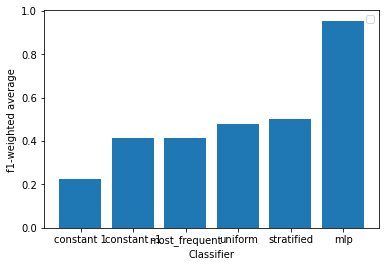

No handles with labels found to put in legend.


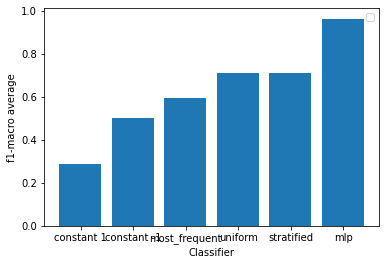

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ky=[]
f1=[]
f2=[]

print("\nf1-weighted average για τους classifiers:\n")
for key, value in sorted(f1_micro.items(), key=lambda k_v: (k_v[1], k_v[0])):
    print("%s: %s" % (key, value))
    f1.append(value)
    ky.append(key)

print("\nf1-macro average για τους classifiers:\n")
for key, value in sorted(f2_macro.items(), key=lambda k_v: (k_v[1], k_v[0])):
    print("%s: %s" % (key, value))
    f2.append(value)

fig= plt.figure()
ax = fig.add_subplot(1,1,1)
bar_l = np.arange(1,7)
tick_pos = [i + (0.05 / 6) for i in bar_l]

ax1 = ax.bar(bar_l,f1,align='center')
ax.set_ylabel("f1-weighted average")
ax.set_xlabel("Classifier")
ax.legend(loc="best")
plt.xticks(tick_pos,ky)
plt.yticks()
plt.show()


fig= plt.figure()
ax = fig.add_subplot(1,1,1)
bar_l = np.arange(1,7)
tick_pos = [i + (0.05 / 6) for i in bar_l]

ax1 = ax.bar(bar_l,f2,align='center')
ax.set_ylabel("f1-macro average")
ax.set_xlabel("Classifier")
ax.legend(loc="best")
plt.xticks(tick_pos,ky)
plt.yticks()
plt.show()

### Βελτιστοποίηση ταξινομητών

- Αρχικά κάνουμε προεπεξεργασία των δεδομένων. 
- Κάνουμε εξισορρόπηση του dataset, καθώς από την αρχική ανάλυση έχουμε διαπιστώσει ότι εναι μη-ισορροπημένο. 
- Προτιμούμε να εφαρμόσουμε oversampling αντί για undersamplin, ώστε να μη χαθούν δεδομένα εκπαίδευσης. 

In [ ]:
# εγκαθηστούμε τη βιβλιοθήκη imbalanced-learn
!pip install --upgrade imbalanced-learn

     |████████████████████████████████| 167 kB 4.9 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer

# αρχικοποίηση του RandomOverSampler
ros = RandomOverSampler(random_state=0)
lb = MultiLabelBinarizer().fit(['-1', '1'])
train_resampled, train_labels_resampled = ros.fit_sample(train,train_labels)

# εκτυπώνουμε τις νέες διαστάσεις του train set
print(train_resampled.shape)
print(train_labels_resampled.shape)
# επιβεβαιώνουμε ότι τα labels είναι στη binary μορφή
print(train_labels_resampled)

# επιβεβαιώνουμε ότι το training set έχει εξισορροπηθεί με oversampling
summ = Counter(train_labels_resampled)
print(summ)
d = summ.values()

(34538, 118)
(34538,)
0       -1
1       -1
2        1
3       -1
4        1
        ..
34533   -1
34534   -1
34535   -1
34536   -1
34537   -1
Name: 119, Length: 34538, dtype: int64
Counter({-1: 17269, 1: 17269})


Από τα παραπάνω, επιβεβαιώνουμε ότι το νέο διάνυσμα train_labels_resampled περιέχει ισάριθμα δεδομένα και από τις δυο κλάσεις, οπότε η υπερδειγματοληψία έγινε επιτυχώς.

Στη συνέχεια θα ασχοληθούμε με την εύρεση των βέλτιστων παραμέτρων στο kNN και MLP. 

Σύμφωνα με την εκφώνηση, οι υπερπαράμετροι του MLP που ζητείται να βελτιστοποιηθούν είναι οι εξής: 
- hidden_layer_sizes, activation, solver, max_iter, learning_rate, alpha. 

Για τον kNN:
- n_neighbors, metric, weights



In [ ]:
activations = {'identity', 'logistic', 'tanh', 'relu'}
solvers = {'lbfgs', 'sgd', 'adam'}
learning_rates = {'constant', 'invscaling', 'adaptive'}
alphas = {0.0001,0.001,0.01,0.1}
max_iters = {100,150,200,250}
mlp_hidden_layer = [18,20,22,24]

In [ ]:
f1_micro_max = 0
f1_macro_max = 0
for mlp_activation in activations:
    for mlp_solver in solvers:
        for mlp_learning_rate in learning_rates:
            for mlp_alpha in alphas:
                for mlp_max_iter in max_iters:
                    for hidden_layer in mlp_hidden_layer:
                        
                        print((mlp_activation,mlp_solver,mlp_alpha,mlp_max_iter,hidden_layer))
                        
                        mlp = MLPClassifier(solver=mlp_solver, alpha=mlp_alpha,hidden_layer_sizes=hidden_layer, max_iter=mlp_max_iter, activation=mlp_activation, learning_rate=mlp_learning_rate)
                    
                        f1_macro_score = cross_val_score(mlp, train_resampled, train_labels_resampled, cv=5, scoring='f1_macro')
                        if f1_macro_score.mean() > f1_macro_max:
                            maximum_macro_parameters = [mlp_solver, mlp_alpha, hidden_layer, mlp_max_iter, mlp_activation, mlp_learning_rate]
                            f1_macro_max = f1_macro_score.mean()
                        
                        f1_micro_score = cross_val_score(mlp, train_resampled, train_labels_resampled, cv=5, scoring='f1_micro')
                        if f1_micro_score.mean() > f1_micro_max:
                            maximum_micro_parameters = [mlp_solver, mlp_alpha, hidden_layer, mlp_max_iter, mlp_activation, mlp_learning_rate]
                            f1_micro_max = f1_micro_score.mean()

In [ ]:
print(maximum_macro_parameters)
print(maximum_micro_parameters)

['lbfgs', 0.1, 24, 200, 'tanh', 'invscaling']
['lbfgs', 0.1, 24, 200, 'tanh', 'invscaling']


Τρέχοντας το παραπάνω block κώδικα, βρίσκουμε ότι οι βέλτιστες παράμετροι από αυτές που έχουμε επιλέξει για τα f1-macro average-resampled και f1-weighted average-resampled είναι οι:

['lbfgs', 0.1, 24, 200, 'tanh', 'invscaling']

['lbfgs', 0.1, 24, 200, 'tanh', 'invscaling']

Kάνουμε εκτίμηση των dummy classifiers στο test set.

In [ ]:
nomao_accuracy_resampled = {}

model_r = dc_uniform2.fit(train_resampled, train_labels_resampled)
nomao_accuracy_resampled['uniform (random)'] = dc_uniform2.score(test, test_labels)
preds_uniform_resampled = dc_uniform2.predict(test)

model_r = dc_constant_1.fit(train_resampled, train_labels_resampled)
nomao_accuracy_resampled['constant -1'] = dc_constant_1.score(test, test_labels)
preds_constant_1_resampled = dc_constant_1.predict(test)

model_r = dc_constant_2.fit(train_resampled, train_labels_resampled)
nomao_accuracy_resampled['constant 1'] = dc_constant_2.score(test, test_labels)
preds_constant_2_resampled = dc_constant_2.predict(test)

model_r = dc_most_frequent2.fit(train_resampled, train_labels_resampled)
nomao_accuracy_resampled['most frequent label'] = dc_most_frequent2.score(test, test_labels)
preds_most_frequent_resampled = dc_most_frequent2.predict(test)

model_r = dc_stratified2.fit(train_resampled, train_labels_resampled)
nomao_accuracy_resampled['stratified'] = dc_stratified2.score(test, test_labels)
preds_stratified_resampled = dc_stratified2.predict(test)

In [ ]:
import timeit
kf = KFold(n_splits=5)
kf.get_n_splits(train_resampled)

cross_macro_resampled=cross_val_score(clf, train_resampled, train_labels_resampled, cv=kf, scoring='f1_micro').mean() 
cross_micro_resampled =cross_val_score(clf, train_resampled, train_labels_resampled, cv=kf, scoring='f1_macro').mean()    

In [ ]:
#Τυπώνουμε τους χρόνους για το fit και το predict του βελτιστοποιημένου mlp ταξινομητή.
import time

start1 = time.time()
model = clf.fit(train_resampled, train_labels_resampled)
end1 = time.time()
print("\nTime for fit: \n",(end1 - start1))

start2 = time.time()
preds_mlp_resampled = clf.predict(test)
end2 = time.time()
print("\nTime for predict: \n",(end2-start2))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Time for fit: 
 132.85772228240967

Time for predict: 
 0.24600958824157715


In [ ]:
import sys
import types
import pandas as pd

def __iter__(self): return 0

print("Classification Accuracy on the Nomao DataSet (30% test set)\n")
for key, value in sorted(nomao_accuracy.items(), key=lambda k_v: (k_v[1], k_v[0])):
    print("%s: %s" % (key, value))

Classification Accuracy on the Nomao DataSet (30% test set)

constant -1: 0.28897485493230174
uniform (random): 0.5038684719535783
stratified: 0.59284332688588
constant 1: 0.7110251450676982
most frequent label: 0.7110251450676982


Τυπώνουμε τους πίνακες σύγχυσης για τους ταξινομητές μετά τη βελτιστοποίηση παραμέτρων.

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix_uniform_resampled = confusion_matrix(test_labels, preds_uniform_resampled)
print("\ncnf_matrix_uniform_resampled\n", cnf_matrix_uniform_resampled)

cnf_matrix_constant_1_resampled = confusion_matrix(test_labels, preds_constant_1_resampled)
print("\ncnf_matrix_constant_1_resampled\n" , cnf_matrix_constant_1_resampled)

cnf_matrix_constant_2_resampled = confusion_matrix(test_labels, preds_constant_2_resampled)
print("\ncnf_matrix_constant_2_resampled\n", cnf_matrix_constant_2_resampled)

cnf_matrix_most_frequent_resampled = confusion_matrix(test_labels, preds_most_frequent_resampled)
print("\ncnf_matrix_most_frequent_resampled\n" , cnf_matrix_most_frequent_resampled)

cnf_matrix_stratified_resampled = confusion_matrix(test_labels, preds_stratified_resampled)
print("\ncnf_matrix_stratified_resampled\n", cnf_matrix_stratified_resampled)

cnf_matrix_clf_resampled = confusion_matrix(test_labels, preds_mlp_resampled)
print("\ncnf_matrix_clf_resampled\n", cnf_matrix_clf_resampled)


cnf_matrix_uniform_resampled
 [[1486 1502]
 [3667 3685]]

cnf_matrix_constant_1_resampled
 [[   0 2988]
 [   0 7352]]

cnf_matrix_constant_2_resampled
 [[2988    0]
 [7352    0]]

cnf_matrix_most_frequent_resampled
 [[2988    0]
 [7352    0]]

cnf_matrix_stratified_resampled
 [[1483 1505]
 [3703 3649]]

cnf_matrix_clf_resampled
 [[2846  142]
 [ 244 7108]]


Στη συνέχεια υπολογίζουμε τα precision, recall και F1 για κάθε estimator. Δημιουργούμε δυο λεξικά, ένα λεξικό που περιέχει τα f1-micro average - resampled για κάθε εκτιμητή και ένα λεξικό που περιέχει τα f1-macro average - resampled.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

f1_micro_resampled={}
f1_micro_resampled['uniform'] = precision_recall_fscore_support(test_labels, preds_uniform_resampled, average='macro')[2]
f1_micro_resampled['constant 2'] = precision_recall_fscore_support(test_labels, preds_constant_2_resampled, average='macro')[2]
f1_micro_resampled['constant 1'] = precision_recall_fscore_support(test_labels, preds_constant_1_resampled, average='macro')[2]
f1_micro_resampled['most_frequent'] = precision_recall_fscore_support(test_labels, preds_most_frequent_resampled, average='macro')[2]
f1_micro_resampled['stratified'] = precision_recall_fscore_support(test_labels, preds_stratified_resampled, average='macro')[2]
f1_micro_resampled['mlp'] = precision_recall_fscore_support(test_labels, preds_mlp_resampled, average='macro')[2]

f2_macro_resampled={}
f2_macro_resampled['uniform'] = precision_recall_fscore_support(test_labels, preds_uniform_resampled, average='micro')[2]
f2_macro_resampled['constant_2'] = precision_recall_fscore_support(test_labels, preds_constant_2_resampled, average='micro')[2]
f2_macro_resampled['constant_1'] = precision_recall_fscore_support(test_labels, preds_constant_1_resampled, average='micro')[2]
f2_macro_resampled['most_frequent'] = precision_recall_fscore_support(test_labels, preds_most_frequent_resampled, average='micro')[2]
f2_macro_resampled['stratified'] = precision_recall_fscore_support(test_labels, preds_stratified_resampled, average='micro')[2]
f2_macro_resampled['mlp'] = precision_recall_fscore_support(test_labels, preds_mlp_resampled, average='micro')[2]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tυπώνουμε τα διαγράμματα των f1-average-resampled και f1-macro-resampled όλων 
των ταξινομητών.

No handles with labels found to put in legend.



f1-micro average-resampled για τους classifiers:

constant 2: 0.22418967587034816
most_frequent: 0.22418967587034816
constant 1: 0.4155550531313588
stratified: 0.47320886659502537
uniform: 0.4764159431467079
mlp: 0.9550287661126715

f1-macro average-resampled για τους classifiers:

constant_1: 0.28897485493230174
uniform: 0.502127659574468
stratified: 0.5935203094777562
constant_-1: 0.7110251450676982
most_frequent: 0.7110251450676982
mlp: 0.9623791102514507


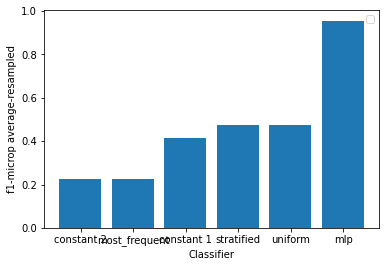

No handles with labels found to put in legend.


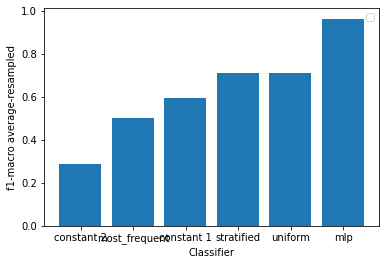

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

kyr=[]
f1r=[]
f2r=[]

print("\nf1-micro average-resampled για τους classifiers:\n")
for key, value in sorted(f1_micro_resampled.items(), key=lambda k_v: (k_v[1], k_v[0])):
    print("%s: %s" % (key, value))
    f1r.append(value)
    kyr.append(key)

print("\nf1-macro average-resampled για τους classifiers:\n")
for key, value in sorted(f2_macro.items(), key=lambda k_v: (k_v[1], k_v[0])):
    print("%s: %s" % (key, value))
    f2r.append(value)

fig= plt.figure()
ax = fig.add_subplot(1,1,1)
bar_l = np.arange(1,7)
tick_pos = [i + (0.05 / 6) for i in bar_l]

ax1 = ax.bar(bar_l,f1r,align='center')
ax.set_ylabel("f1-microp average-resampled")
ax.set_xlabel("Classifier")
ax.legend(loc="best")
plt.xticks(tick_pos,kyr)
plt.yticks()
plt.show()


fig= plt.figure()
ax = fig.add_subplot(1,1,1)
bar_l = np.arange(1,7)
tick_pos = [i + (0.05 / 6) for i in bar_l]

ax1 = ax.bar(bar_l,f2r,align='center')
ax.set_ylabel("f1-macro average-resampled")
ax.set_xlabel("Classifier")
ax.legend(loc="best")
plt.xticks(tick_pos,kyr)
plt.yticks()
plt.show()

Πίνακες επίδοσης ταξινομητών

In [ ]:
print("Μεταβολή Επίδοσης Ταξινομητών\n")

for key, value in (nomao_accuracy.items()):
    for key2, value2 in (nomao_accuracy_resampled.items()):
        if (key==key2):
            print("%s: %s" % (key, value2-value))

Μεταβολή Επίδοσης Ταξινομητών

uniform (random): -0.006286266924564798
constant 1: -0.42205029013539647
constant -1: 0.42205029013539647
most frequent label: -0.42205029013539647
stratified: -0.09313346228239844
